In [1]:
# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
#from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Embedding,Bidirectional, LSTM, Dropout, Dense
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# set seeds for reproducability
from tensorflow import random
from numpy.random import seed
random.set_seed(2)
seed(1)
import pandas as pd
import numpy as np
import string, os 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
 curr_dir = '../Research_PR/'
headers = ["Description"]

# for filename in os.listdir(curr_dir):
#     if 'Articles' in filename:
#         article_df = pd.read_csv("test_res.csv",names = headers, sep='\t')
#         all_headlines.extend(list(article_df.headline.values))
#         break
#         all_headlines = [h for h in all_headlines if h != "Unknown"]
#         len(all_headlines)

        
all_headlines = pd.read_csv("/content/gdrive/My Drive/jd_role_res_corpus_V1.csv", names = headers, sep='\t',nrows= 100)       
#all_headlines = pd.read_csv("test_res.csv", names = headers, sep='\t',nrows=100)
#all_headlines = pd.read_csv("clean_desc.csv", sep='\t',nrows=100)

#clean_desc.csv
# # all_headlines.extend(list(article_df.Description.values))
# all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

100

In [4]:
all_headlines

,Description
0,"Working within an agile environment, the Senio..."
1,Define & implement Policies & SOPs
2,"Monitor operations, develop and report quality..."
3,", Data Services"
4,Data Dictionary
...,...
95,Demonstrated ability to participate in require...
96,Excellent written and oral communication skills
97,","
98,"THE FOLLOWING IS DESIRED, BUT NOT REQUIRED TO ..."


In [5]:
all_headlines.shape

(100, 1)

In [6]:
texts = list(set(all_headlines['Description']))
print (texts)


['DESIRED QUALIFICATIONS:', '[\n\nApply your expertise in quantitative analysis, data mining, and the presentation of data to see beyond the numbers and understand how our users interact with both our consumer and business products, \n\nPartner with Product and Engineering teams to solve problems and identify trends and opportunities, \n\nInform, influence, support, and execute our product decisions and product launches, \n\nThe Data Scientist Analytics role has work across the following four areas:, \n\nProduct Operations, \n\nForecasting and setting product team goals, Forecasting and setting product team goals, \n\nDesigning and evaluating experiments, Designing and evaluating experiments, \n\nMonitoring key product metrics, understanding root causes of changes in metrics, Monitoring key product metrics, understanding root causes of changes in metrics, \n\nBuilding and analyzing dashboards and reports, Building and analyzing dashboards and reports, \n\nBuilding key data sets to empo

In [7]:
len(texts)

99

In [8]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [x for x in texts]
corpus[:100]

['DESIRED QUALIFICATIONS:',
 '[\n\nApply your expertise in quantitative analysis, data mining, and the presentation of data to see beyond the numbers and understand how our users interact with both our consumer and business products, \n\nPartner with Product and Engineering teams to solve problems and identify trends and opportunities, \n\nInform, influence, support, and execute our product decisions and product launches, \n\nThe Data Scientist Analytics role has work across the following four areas:, \n\nProduct Operations, \n\nForecasting and setting product team goals, Forecasting and setting product team goals, \n\nDesigning and evaluating experiments, Designing and evaluating experiments, \n\nMonitoring key product metrics, understanding root causes of changes in metrics, Monitoring key product metrics, understanding root causes of changes in metrics, \n\nBuilding and analyzing dashboards and reports, Building and analyzing dashboards and reports, \n\nBuilding key data sets to emp

In [9]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
# inp_sequences[:10]
inp_sequences

[[137, 138],
 [386, 56],
 [386, 56, 139],
 [386, 56, 139, 6],
 [386, 56, 139, 6, 96],
 [386, 56, 139, 6, 96, 16],
 [386, 56, 139, 6, 96, 16, 3],
 [386, 56, 139, 6, 96, 16, 3, 387],
 [386, 56, 139, 6, 96, 16, 3, 387, 1],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217, 388],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217, 388, 4],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217, 388, 4, 389],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217, 388, 4, 389, 1],
 [386, 56, 139, 6, 96, 16, 3, 387, 1, 4, 97, 5, 3, 2, 217, 388, 4, 389, 1, 98],
 [386,
  56,
  139,
  6,
  96,
  16,
  3,
  387,
  1,
  4,
  97,
  5,
  3,
  2,
  217,
  388,
  4,
  389,
  1,
  9

In [10]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [11]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 660, 10)           9970      
_________________________________________________________________
lstm (LSTM)                  (None, 100)               44400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 997)               100697    
Total params: 155,067
Trainable params: 155,067
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(predictors, label, epochs=10, verbose=5)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [13]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [16]:
# print (generate_text("strong communication,design and develop,implement,and test data analysis", 50, model, max_sequence_len))
# print()


print (generate_text("business analyst role", 50, model, max_sequence_len))
# print()


#print (generate_text("Strong Organization & Project Management Skills", 110, model, max_sequence_len))


Business Analyst Role And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And And


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


def Convert(string):
    li = list(string.split(" "))
    return li
  
# Driver code  
docs = generate_text("Monitor operations", 50, model, max_sequence_len)  
docs1 = Convert(docs)

print(type(docs1))
docs2 = texts[:3]
print(type(docs2))

print(docs1)
print(docs2)


<class 'list'>
<class 'list'>
['Monitor', 'Operations', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And', 'And']
['DESIRED QUALIFICATIONS:', '[\n\nApply your expertise in quantitative analysis, data mining, and the presentation of data to see beyond the numbers and understand how our users interact with both our consumer and business products, \n\nPartner with Product and Engineering teams to solve problems and identify trends and opportunities, \n\nInform, influence, support, and execute our product decisions and product launches, \n\nThe Data Scientist Analytics role has work across the following four areas:, \n\nProduct Operations, \n\nForecasting and setting product team goals, Forecasting and 

In [39]:


def word2vec(word):
    from collections import Counter
    from math import sqrt

    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]


threshold = 0.80     # if needed
for key in docs1:
    for word in docs2:
        try:
            # print(key)
            # print(word)
            res = cosdis(word2vec(word), word2vec(key))
            # print(res)
            print("The cosine similarity between : {} and : {} is: {}".format(word, key, res*100))
            # if res > threshold:
            #     print("Found a word with cosine distance > 80 : {} with original word: {}".format(word, key))
        except IndexError:
            pass

The cosine similarity between : DESIRED QUALIFICATIONS: and : Monitor is: 0.0
The cosine similarity between : [

Apply your expertise in quantitative analysis, data mining, and the presentation of data to see beyond the numbers and understand how our users interact with both our consumer and business products, 

Partner with Product and Engineering teams to solve problems and identify trends and opportunities, 

Inform, influence, support, and execute our product decisions and product launches, 

The Data Scientist Analytics role has work across the following four areas:, 

Product Operations, 

Forecasting and setting product team goals, Forecasting and setting product team goals, 

Designing and evaluating experiments, Designing and evaluating experiments, 

Monitoring key product metrics, understanding root causes of changes in metrics, Monitoring key product metrics, understanding root causes of changes in metrics, 

Building and analyzing dashboards and reports, Building and analy

In [ ]:
#Performance Metrics :

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.evaluate(predictors, label)


3/3 [==============================] - 1s 17ms/step - loss: 0.0679 - accuracy: 0.0461


[0.06807312369346619, 0.03750000149011612]

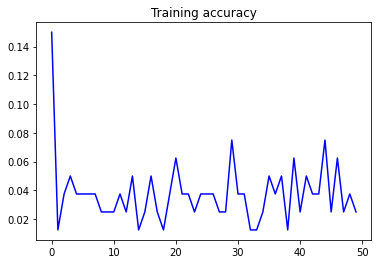

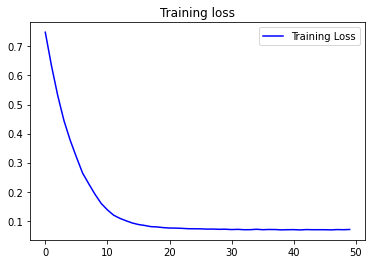

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

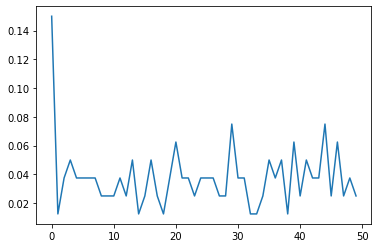

In [ ]:
# plot metrics
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.show()